In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loaing dataset
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
print("Dataset loaded successfully")
df.head()

Dataset loaded successfully


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
print(df.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [5]:
print("Missing Values Before Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [6]:
# numerical → median
print("Missing Values Before Handling:")
print(df.isnull().sum())
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    df[col] = df[col].fillna(df[col].median())

# categorical → mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
print("\nMissing Values After Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Missing Values After Handling:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon       

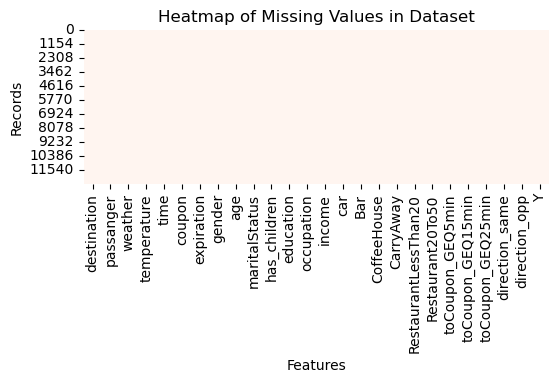

In [9]:
plt.figure(figsize=(6, 2))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Heatmap of Missing Values in Dataset")
plt.xlabel("Features")
plt.ylabel("Records")
plt.show()

In [10]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalstatus', 'has_children', 'education', 'occupation', 'income', 'car', 'bar', 'coffeehouse', 'carryaway', 'restaurantlessthan20', 'restaurant20to50', 'tocoupon_geq5min', 'tocoupon_geq15min', 'tocoupon_geq25min', 'direction_same', 'direction_opp', 'y']


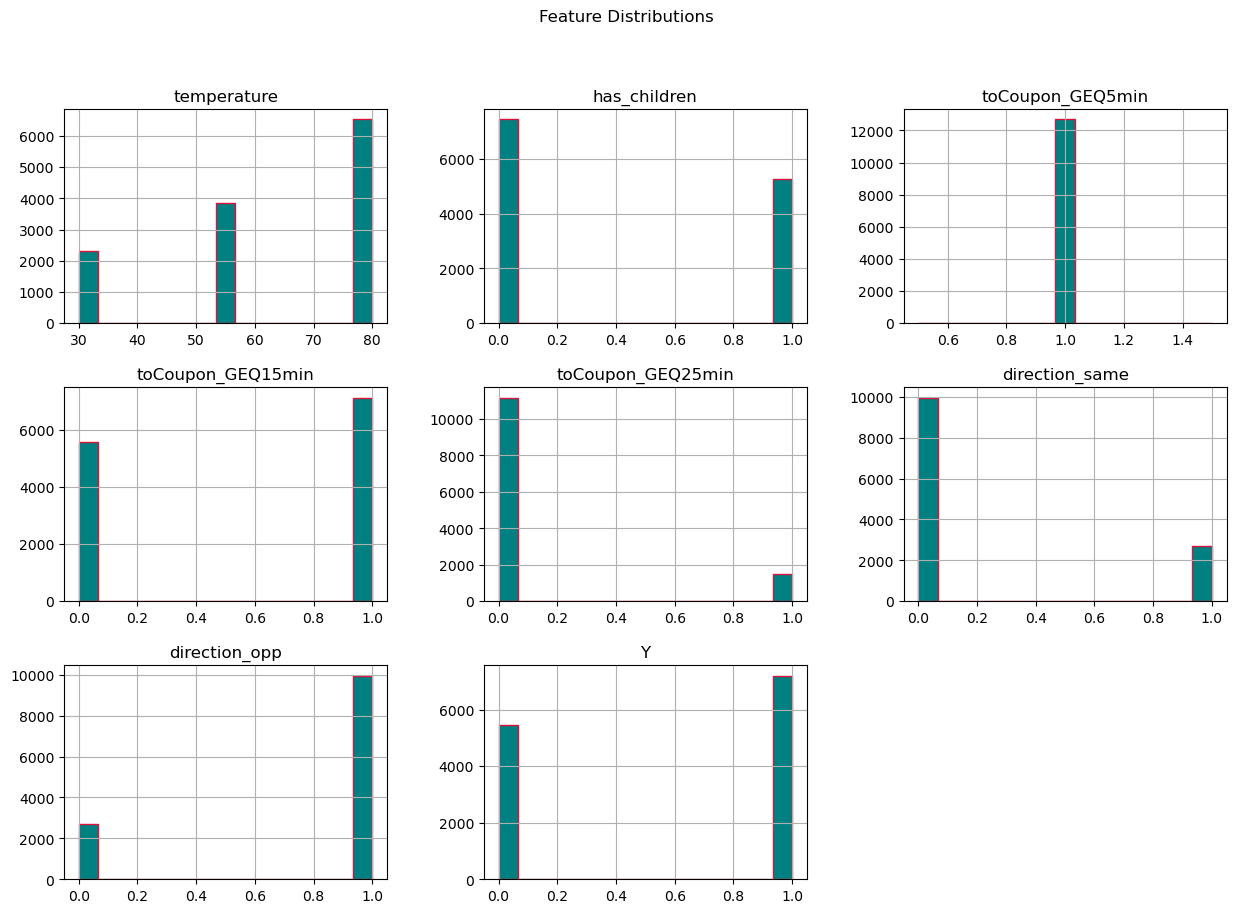

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("in-vehicle-coupon-recommendation.csv")
data.hist(bins=15, figsize=(15, 10), color='teal', edgecolor='crimson')
plt.suptitle("Feature Distributions")
plt.show()

In [12]:
df.rename(columns={'passanger': 'passenger'}, inplace=True)
print(df.columns)

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalstatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'bar', 'coffeehouse',
       'carryaway', 'restaurantlessthan20', 'restaurant20to50',
       'tocoupon_geq5min', 'tocoupon_geq15min', 'tocoupon_geq25min',
       'direction_same', 'direction_opp', 'y'],
      dtype='object')


In [15]:
#Select ony 5 validate feature
selected_features = [
    "time",
    "weather",
    "destination",
    "coupon",
    "tocoupon_geq15min"
]

In [16]:
print(df.columns.tolist())

['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalstatus', 'has_children', 'education', 'occupation', 'income', 'car', 'bar', 'coffeehouse', 'carryaway', 'restaurantlessthan20', 'restaurant20to50', 'tocoupon_geq5min', 'tocoupon_geq15min', 'tocoupon_geq25min', 'direction_same', 'direction_opp', 'y']


In [20]:
#Validation check 
missing = [col for col in selected_features if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns in dataset: {missing}")


In [ ]:
X = df[selected_features]
y = df["y"]

In [21]:
categorical_cols = ["time", "weather", "destination", "coupon"]
numerical_cols = ["tocoupon_geq15min"]

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)


In [23]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [26]:
X = df[selected_features]
y = df["y"]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [28]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['time', 'weather',
                                                   'destination', 'coupon']),
                                                 ('num', StandardScaler(),
                                                  ['tocoupon_geq15min'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [29]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6318486401261332

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.48      0.54      1128
           1       0.64      0.75      0.69      1409

    accuracy                           0.63      2537
   macro avg       0.63      0.62      0.62      2537
weighted avg       0.63      0.63      0.62      2537



In [30]:
options = {}
for col in categorical_cols:
    options[col] = sorted(df[col].unique())
print("Available input options:", options.keys())

Available input options: dict_keys(['time', 'weather', 'destination', 'coupon'])


In [31]:
def get_user_choice(column_name, choices):
    print(f"\nSelect {column_name}:")
    for i, val in enumerate(choices):
        print(f"{i}. {val}")

    while True:
        try:
            choice = int(input("Enter option number: "))
            if 0 <= choice < len(choices):
                return choices[choice]
            else:
                print("Invalid option. Try again.")
        except ValueError:
            print("Please enter a number.")

In [32]:
print("\n=Coupon Recommendation System =")
user_data = {}
# categorical inputs
for col in categorical_cols:
    user_data[col] = get_user_choice(col, options[col])

# numerical input (1)
user_data["tocoupon_geq15min"] = int(
    input("\nIs distance ≥ 15 minutes? (1 = Yes, 0 = No): ")
)
user_input = pd.DataFrame([user_data])


=Coupon Recommendation System =

Select time:
0. 10AM
1. 10PM
2. 2PM
3. 6PM
4. 7AM


Enter option number:  0



Select weather:
0. Rainy
1. Snowy
2. Sunny


Enter option number:  1



Select destination:
0. Home
1. No Urgent Place
2. Work


Enter option number:  3


Invalid option. Try again.


Enter option number:  5


Invalid option. Try again.


Enter option number:  2



Select coupon:
0. Bar
1. Carry out & Take away
2. Coffee House
3. Restaurant(20-50)
4. Restaurant(<20)


Enter option number:  1

Is distance ≥ 15 minutes? (1 = Yes, 0 = No):  1


In [33]:
probability = model.predict_proba(user_input)[0][1]

In [34]:
threshold = 0.5
print("\n Recommendation Result")
if probability >= threshold:
    print("RECOMMEND COUPON")
else:
    print("DO NOT RECOMMEND COUPON")
print("Acceptance Probability:", round(probability, 2))


 Recommendation Result
RECOMMEND COUPON
Acceptance Probability: 0.61


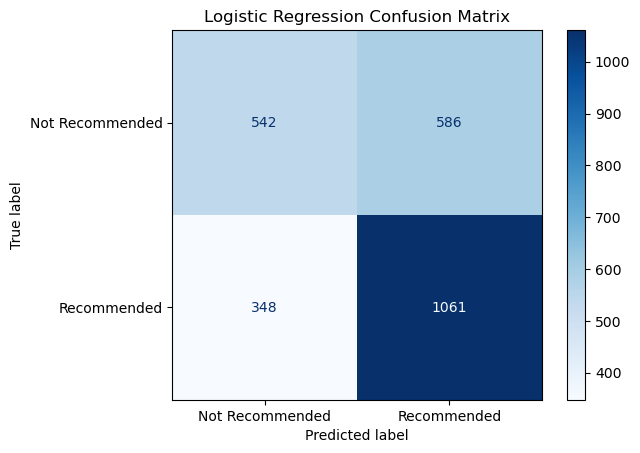

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=["Not Recommended", "Recommended"]
)
disp.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


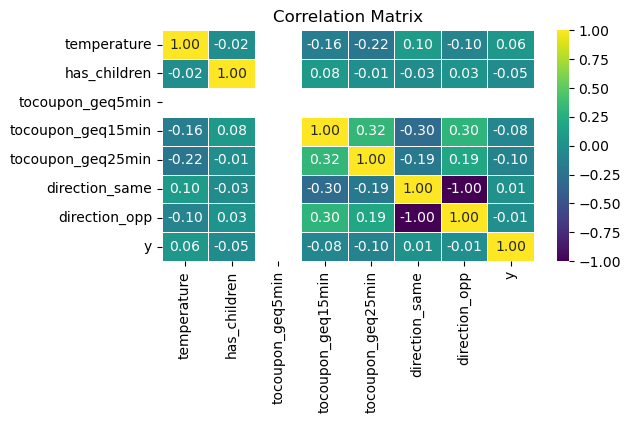

In [37]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [42]:
categorical_cols = ["time", "weather", "destination", "coupon"]
numerical_cols = ["tocoupon_geq15min"]

In [47]:
# correct feature names (MATCH DATASET)
content_features = [
    "time",
    "weather",
    "destination",
    "coupon",
    "tocoupon_geq15min"   
]

# detect target column
target_col = "y" if "y" in df.columns else "Y"

# use only accepted coupons
accepted_df = df[df[target_col] == 1][content_features]

# encode accepted data
encoder = OneHotEncoder(handle_unknown="ignore")
encoded_matrix = encoder.fit_transform(accepted_df)

# user input
print("\n=== Content-Based Recommendation ===")
user_input = {
    "time": input("Enter time: "),
    "weather": input("Enter weather: "),
    "destination": input("Enter destination: "),
    "coupon": input("Enter coupon type: "),
    "tocoupon_geq15min": int(input("Is distance ≥15 min? (1/0): "))  
}

user_df = pd.DataFrame([user_input])

# similarity
user_vec = encoder.transform(user_df)
scores = cosine_similarity(user_vec, encoded_matrix)

top_idx = scores[0].argsort()[-5:][::-1]

print("\nRecommended Coupons:")
print(accepted_df.iloc[top_idx]["coupon"].value_counts())



=== Content-Based Recommendation ===


Enter time:  2pm
Enter weather:  sunny
Enter destination:  home
Enter coupon type:  bar
Is distance ≥15 min? (1/0):  0



Recommended Coupons:
coupon
Coffee House             2
Carry out & Take away    1
Restaurant(<20)          1
Bar                      1
Name: count, dtype: int64


In [53]:
# select data (FIXED target column)
cf_df = df[["destination", "weather", "coupon", "y"]].copy()

In [55]:
# encoders
le_dest = LabelEncoder()
le_weather = LabelEncoder()
le_coupon = LabelEncoder()

cf_df["destination"] = le_dest.fit_transform(cf_df["destination"])
cf_df["weather"] = le_weather.fit_transform(cf_df["weather"])
cf_df["coupon"] = le_coupon.fit_transform(cf_df["coupon"])

X_cf = cf_df.drop("y", axis=1)

In [56]:
knn = NearestNeighbors(n_neighbors=5, metric="cosine")
knn.fit(X_cf)

NearestNeighbors(metric='cosine')

In [60]:
# ---------------- USER INPUT ----------------
print("\n=== KNN Collaborative Filtering ===")

def choose(col, values):
    print(f"\nChoose {col}:")
    for i, v in enumerate(values):
        print(f"{i}. {v}")
    return values[int(input("Enter option: "))]

dest = choose("destination", list(le_dest.classes_))
weather = choose("weather", list(le_weather.classes_))
coupon = choose("coupon", list(le_coupon.classes_))

user_df = pd.DataFrame([{
    "destination": le_dest.transform([dest])[0],
    "weather": le_weather.transform([weather])[0],
    "coupon": le_coupon.transform([coupon])[0]
}])

# find neighbors
_, indices = knn.kneighbors(user_df)

print("\nRecommended Coupons:")
print(df.iloc[indices[0]]["coupon"].value_counts())


=== KNN Collaborative Filtering ===

Choose destination:
0. Home
1. No Urgent Place
2. Work


Enter option:  0



Choose weather:
0. Rainy
1. Snowy
2. Sunny


Enter option:  1



Choose coupon:
0. Bar
1. Carry out & Take away
2. Coffee House
3. Restaurant(20-50)
4. Restaurant(<20)


Enter option:  3



Recommended Coupons:
coupon
Restaurant(20-50)    5
Name: count, dtype: int64


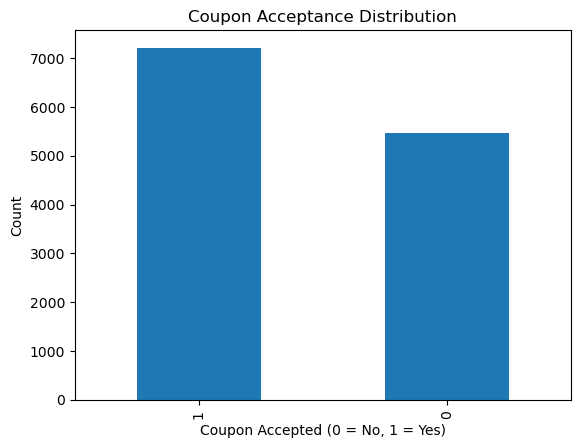

In [62]:
df["y"].value_counts().plot(kind="bar")
plt.xlabel("Coupon Accepted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Coupon Acceptance Distribution")
plt.show()

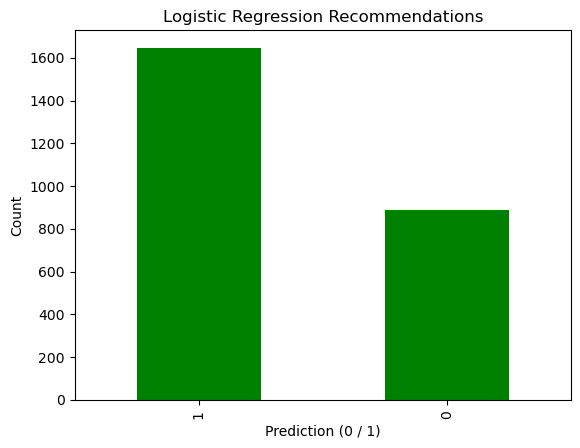

In [63]:
pd.Series(y_pred).value_counts().plot(kind="bar", color="green")
plt.title("Logistic Regression Recommendations")
plt.xlabel("Prediction (0 / 1)")
plt.ylabel("Count")
plt.show()

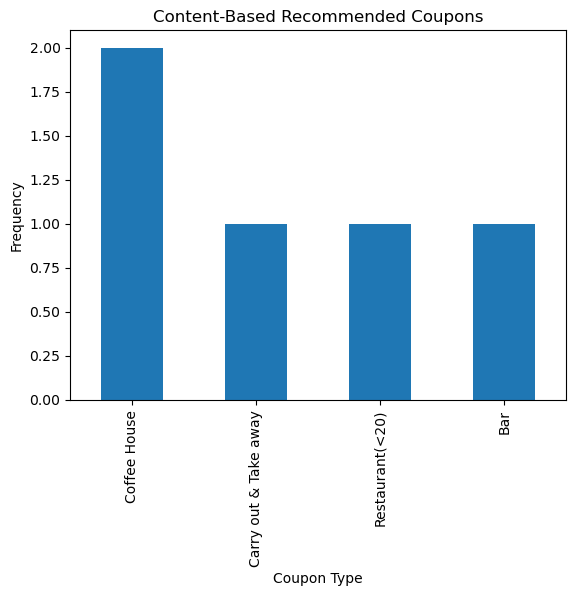

In [64]:
recommended_coupons = accepted_df.iloc[top_idx]["coupon"].value_counts()
recommended_coupons.plot(kind="bar")
plt.title("Content-Based Recommended Coupons")
plt.xlabel("Coupon Type")
plt.ylabel("Frequency")
plt.show()

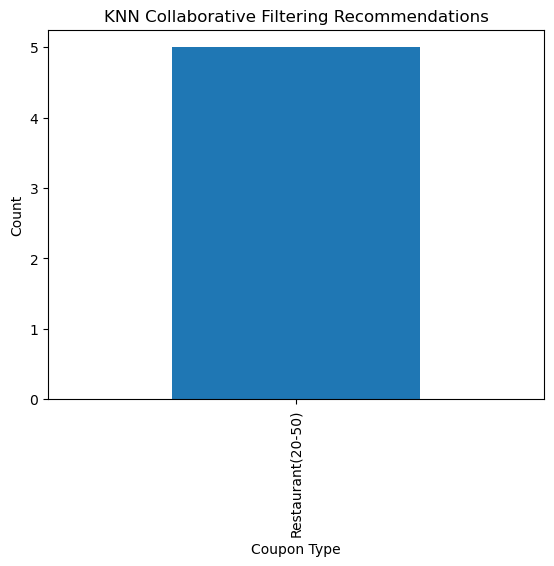

In [65]:
recommended = df.iloc[indices[0]]["coupon"].value_counts()
recommended.plot(kind="bar")
plt.title("KNN Collaborative Filtering Recommendations")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.show()